In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler

In [2]:
#load the data 
wmt_df = pd.read_csv('WMT.csv')

In [3]:
wmt_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-03,78.809998,79.129997,78.519997,78.650002,64.781410,4957400
1,2014-01-06,78.860001,78.910004,77.790001,78.209999,64.418961,7280200
2,2014-01-07,78.169998,78.849998,77.919998,78.449997,64.616684,5012300
3,2014-01-08,78.500000,78.510002,77.599998,77.830002,64.106010,5955200
4,2014-01-09,78.389999,78.400002,77.489998,78.089996,64.320175,5916300


In [4]:
#Inspect it 
print(wmt_df)

            Date        Open        High         Low       Close   Adj Close  \
0     2014-01-03   63.619999   63.889999   63.400002   63.490002   49.632183   
1     2014-01-06   63.680000   63.689999   62.669998   63.060001   49.296040   
2     2014-01-07   63.029999   63.290001   62.599998   62.910000   49.178783   
3     2014-01-08   62.810001   62.820000   62.430000   62.689999   49.006805   
4     2014-01-09   62.889999   63.590000   62.770000   63.340000   49.514927   
...          ...         ...         ...         ...         ...         ...   
2168  2022-08-15  171.830002  174.160004  170.199997  173.389999  172.309998   
2169  2022-08-16  177.110001  183.889999  175.559998  180.190002  180.190002   
2170  2022-08-17  174.160004  177.990005  170.830002  175.339996  175.339996   
2171  2022-08-18  173.979996  175.139999  171.580002  173.050003  173.050003   
2172  2022-08-19  171.830002  171.919998  166.789993  167.039993  167.039993   

        Volume  
0      4589400  
1    

In [5]:
#print the summary 
print(wmt_df.describe())

              Open         High          Low        Close    Adj Close  \
count  2175.000000  2175.000000  2175.000000  2175.000000  2175.000000   
mean     99.332570   100.157444    98.585136    99.366308    92.474061   
std      28.148637    28.454473    27.864008    28.144911    30.924251   
min      56.389999    57.060001    56.299999    56.419998    48.553192   
25%      75.084999    75.494999    74.669998    75.115002    64.001396   
50%      90.110001    90.500000    89.250000    90.050003    83.006279   
75%     123.750000   125.194999   121.875000   123.680000   120.627899   
max     160.250000   160.770004   159.070007   159.869995   158.600250   

             Volume  
count  2.175000e+03  
mean   8.380627e+06  
std    4.796427e+06  
min    2.227400e+06  
25%    5.833800e+06  
50%    7.158500e+06  
75%    9.444650e+06  
max    8.089810e+07  


In [6]:
#now prep the data for 2014-2019
wmt_df.set_index(pd.DatetimeIndex(wmt_df['Date']), inplace=True)

In [8]:
#Keep the close for 2014-19
wmt_df = wmt_df[['Close']]

In [9]:
print(wmt_df)

                 Close
Date                  
2014-01-03   78.650002
2014-01-06   78.209999
2014-01-07   78.449997
2014-01-08   77.830002
2014-01-09   78.089996
...                ...
2022-08-17  139.520004
2022-08-18  139.070007
2022-08-19  137.020004
2022-08-22  134.570007
2022-08-23  134.000000

[2175 rows x 1 columns]


In [10]:
print (wmt_df.index.max())

2022-08-23 00:00:00


In [11]:

data_14_22 = wmt_df.filter(['Close'])
dataset_14_22 = data_14_22.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset_14_22)

training_data_len =math.ceil(len(dataset_14_22) *.7)
train_data =scaled_data[0:training_data_len , : ]


X_train_data = []
y_train_data = []

for i in range(1500,len(train_data)):
    X_train_data=list(X_train_data)
    y_train_data=list(y_train_data)
    X_train_data.append(train_data[i-1500:i,0])
    y_train_data.append(train_data[i,0])
    
    X_train_data1, y_train_data1 = np.array(X_train_data), np.array(y_train_data)
    
    X_train_data2 = np.reshape(X_train_data1,(X_train_data1.shape[0],X_train_data1.shape[1],1))

   
    
#1500 = number of days you can change it accordingly. 

# There will be a total of 60 values, 1st column will contain an index of 0-59
# The second will have an index of 1-60 ++_
# the y_train has the 60 st value on c1 and c2 will have 61++

In [12]:
#Lets build the LSTM MODEL 

model = Sequential()

model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train_data2.shape[1],1)))

model.add(LSTM(units=50, return_sequences=False))

model.add(Dense(units=25))

model.add(Dense(units=1))


#okay this example will have 2 LSTM layers w/50 neurons and 2 dense layers
# plust one with 25 nuerons 

2022-08-24 12:47:26.995626: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
# Comple the model 

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_data2, y_train_data1, batch_size=1, epochs=1)

23/23 [==============================] - 13s 461ms/step - loss: 0.0405


In [14]:
test_data = scaled_data[training_data_len -1500: , : ]

X_test = []

y_test = dataset_14_22[training_data_len : , : ]

for i in range(1500,len(test_data)):
    
    X_test.append(test_data[i-1500:i,0])

X_test = np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)


21/21 [==============================] - 5s 193ms/step


In [15]:
# Error calculation where RMSE = root mean squared error 

rmse=np.sqrt(np.mean(((predictions-y_test)**2)))

In [16]:
print(rmse)

7.465396027767214


In [17]:
#OOOF okay the lower the value is to 0 the better
# it indicates that the models p-value match the actual values from the data set 
# which in this case it does not. 

/Users/dashickscott/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


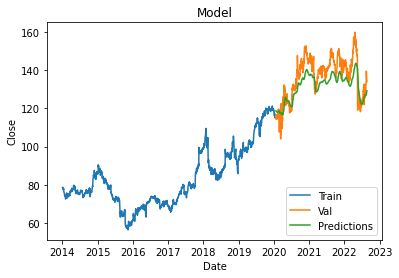

In [19]:
#Predict and visualize 

train = wmt_df[:training_data_len]

valid = wmt_df[training_data_len:]

valid['Predictions'] = predictions

plt.title('Model')

plt.xlabel('Date')

plt.ylabel('Close')

plt.plot(train['Close'])

plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()


<AxesSubplot:xlabel='Date'>

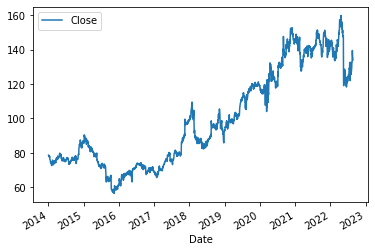

In [20]:
wmt_df.plot()

In [21]:
train['Close']

Date
2014-01-03     78.650002
2014-01-06     78.209999
2014-01-07     78.449997
2014-01-08     77.830002
2014-01-09     78.089996
                 ...    
2020-01-15    115.279999
2020-01-16    115.900002
2020-01-17    114.959999
2020-01-21    115.589996
2020-01-22    116.099998
Name: Close, Length: 1523, dtype: float64

In [22]:
valid[['Close', 'Predictions']]

,Close,Predictions
Date,,
2020-01-23,115.809998,118.709259
2020-01-24,114.370003,118.595329
2020-01-27,115.860001,118.468147
2020-01-28,116.599998,118.364967
2020-01-29,115.889999,118.300423
...,...,...
2022-08-17,139.520004,127.397453
2022-08-18,139.070007,127.840836
2022-08-19,137.020004,128.358841


In [23]:
complete_df = pd.concat([train[['Close']], valid[['Close', 'Predictions']]])
complete_df

,Close,Predictions
Date,,
2014-01-03,78.650002,NaN
2014-01-06,78.209999,NaN
2014-01-07,78.449997,NaN
2014-01-08,77.830002,NaN
2014-01-09,78.089996,NaN
...,...,...
2022-08-17,139.520004,127.397453
2022-08-18,139.070007,127.840836
2022-08-19,137.020004,128.358841


In [ ]:
#Stop

In [24]:
complete_df.head()

,Close,Predictions
Date,,
2014-01-03,78.650002,NaN
2014-01-06,78.209999,NaN
2014-01-07,78.449997,NaN
2014-01-08,77.830002,NaN
2014-01-09,78.089996,NaN


In [26]:
complete_df2 = complete_df.dropna()

print(complete_df2)

                 Close  Predictions
Date                               
2020-01-23  115.809998   118.709259
2020-01-24  114.370003   118.595329
2020-01-27  115.860001   118.468147
2020-01-28  116.599998   118.364967
2020-01-29  115.889999   118.300423
...                ...          ...
2022-08-17  139.520004   127.397453
2022-08-18  139.070007   127.840836
2022-08-19  137.020004   128.358841
2022-08-22  134.570007   128.865479
2022-08-23  134.000000   129.287247

[652 rows x 2 columns]


In [27]:
complete_df2.to_csv('AP_WMT.csv', index=False)